In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
data = pd.read_csv('Instagram data.csv',encoding='cp1252')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

# Check null values in data set

In [6]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
# In the given data set have no null values 
# if null values exsist in the dataset then we wil remove  it by
# data = data.dropna() function


# Information About Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing Instagram Reach

# Impression From Home

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


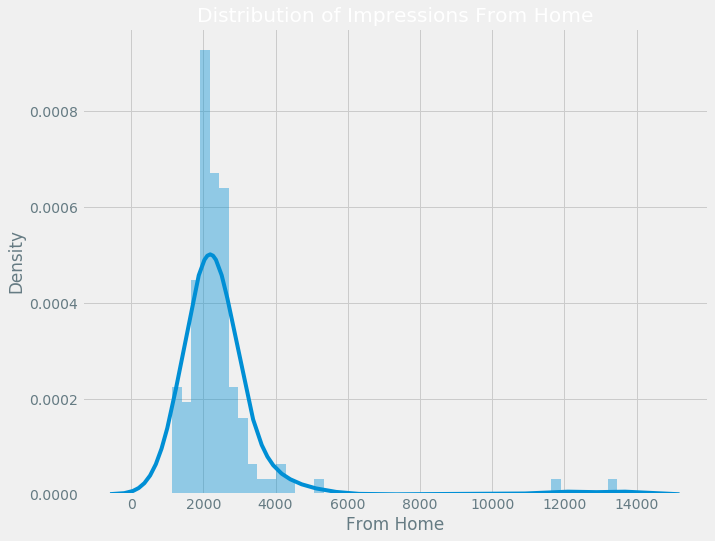

In [18]:
# This plot shows that how much posts reach to my followers from home
# And these are impressions from home



plt.figure(figsize=(10,8))
# fivethirtyeight
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

# Impression From Hasttag

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


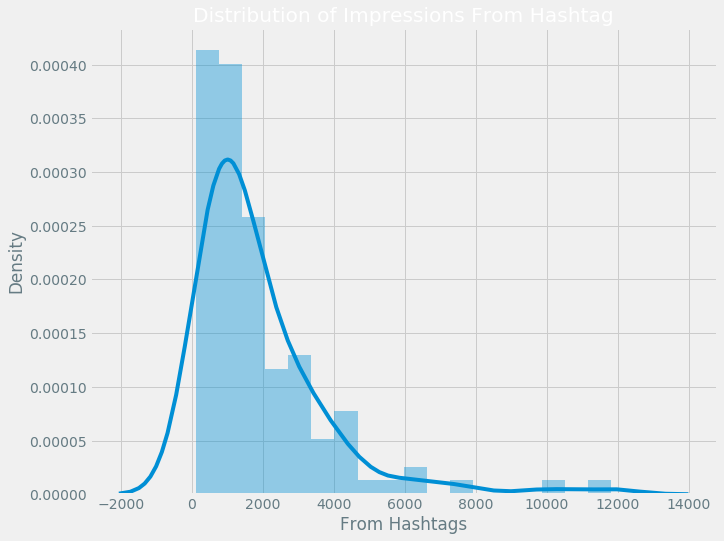

In [22]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions From Hashtag')
sns.distplot(data['From Hashtags'])
plt.show()

# Impressions From Explore

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


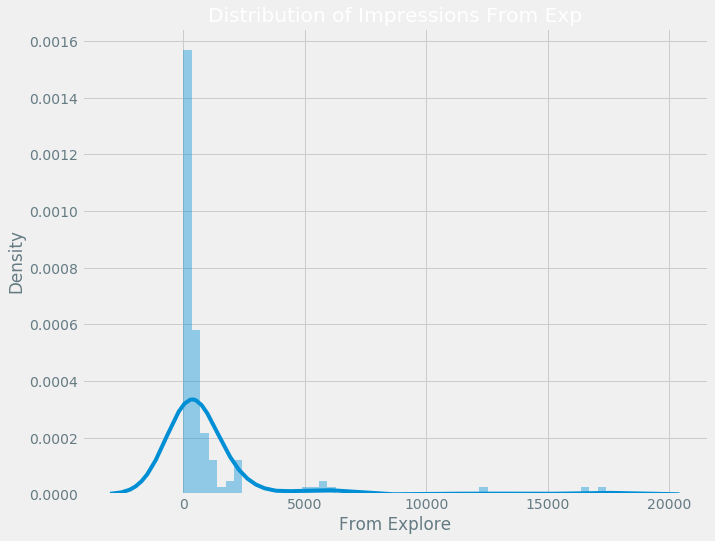

In [23]:
# Recommended posts to the users on the basis of intrests

plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Exp")
sns.distplot(data['From Explore'])
plt.show()

# Percentage of the Impressions

In [29]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels, title='Impressions on Insagram Posts From Various Sources', hole=0.3
            )
fig.show()

# Analyzing Content

# WordCloud of Captions 

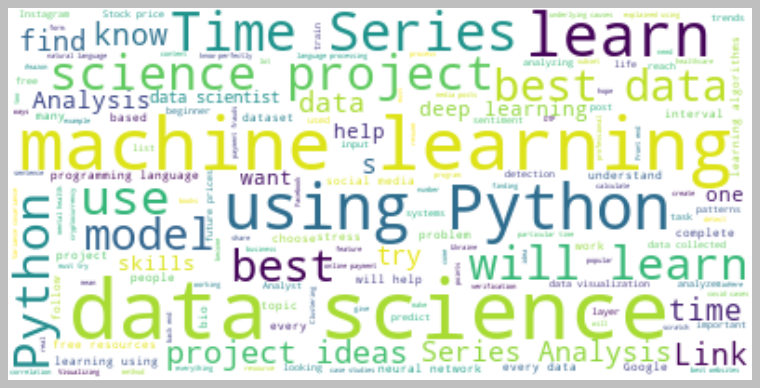

In [35]:
"""Word Cloud Chart is a visualization method that allows you to quickly see which 
words appear more frequently in a bunch of text.  """

text = "".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud of Hashtags

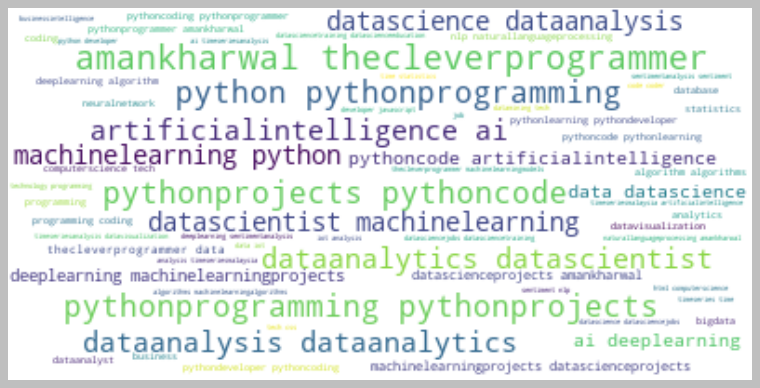

In [45]:
text = "".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Relationships between Number of Likes and Impressions

In [48]:
figure = px.scatter(data_frame = data, x = "Impressions",y = "Likes"
                   , size='Likes', trendline='ols', 
                    title='Relationship Between Likes and Impression')
figure.show()

# Relationships between Number of Comments and Impressions

In [50]:
figure = px.scatter(data_frame = data, x = "Impressions",y = "Comments"
                   , size='Comments', trendline='ols', 
                    title='Relationship Between Comments and Impression')
figure.show()

# Relationships between Number of Shares and Impressions

In [51]:
figure = px.scatter(data_frame = data, x = "Impressions",y = "Shares"
                   , size='Shares', trendline='ols', 
                    title='Relationship Between Shares and Impression')
figure.show()

# Relationships between Number of Saves and Impressions

In [52]:
figure = px.scatter(data_frame = data, x = "Impressions",y = "Saves"
                   , size='Saves', trendline='ols', 
                    title='Relationship Between Post Saves and Impression')
figure.show()

# Correlation between variables

In [53]:
correlation = data.corr()
print(correlation)

                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

In [55]:
correlation['Impressions'].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [56]:
correlation['Comments'].sort_values(ascending=False)

Comments          1.000000
From Hashtags     0.161439
Likes             0.123586
Profile Visits    0.096714
Shares            0.016933
From Home         0.012716
Saves            -0.026912
Impressions      -0.028524
Follows          -0.060631
From Other       -0.108703
From Explore     -0.158565
Name: Comments, dtype: float64

In [57]:
correlation['Shares'].sort_values(ascending=False)

Shares            1.000000
Saves             0.860324
Likes             0.707794
From Home         0.674985
Impressions       0.634675
From Explore      0.615731
Follows           0.493070
Profile Visits    0.245361
From Hashtags     0.219511
From Other        0.156834
Comments          0.016933
Name: Shares, dtype: float64

In [58]:
correlation['Likes'].sort_values(ascending=False)

Likes             1.000000
Impressions       0.849835
Saves             0.845643
Follows           0.746333
Shares            0.707794
From Home         0.698330
From Hashtags     0.662124
From Explore      0.653699
Profile Visits    0.626107
From Other        0.393510
Comments          0.123586
Name: Likes, dtype: float64

In [61]:
correlation['Saves'].sort_values(ascending=False)

Saves             1.000000
Shares            0.860324
Likes             0.845643
Impressions       0.779231
From Home         0.768817
From Explore      0.747803
Follows           0.628461
Profile Visits    0.360628
From Other        0.331907
From Hashtags     0.305929
Comments         -0.026912
Name: Saves, dtype: float64

In [62]:
conversion_rate = (data['Follows'].sum()/data['Profile Visits'].sum())*100
print(conversion_rate)

41.00265604249668


In [64]:
figure = px.scatter(data_frame = data,
                    x='Profile Visits',
                    y = 'Follows', size="Follows",
                    title='Relationship Between Profile Visits and Followers Gained',
                   trendline='ols')
figure.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [67]:
correlation['Impressions'].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [72]:
x = np.array(data[['Likes', 'Saves', 'Comments',
                  'Profile Visits', 'Follows']])
y = np.array(data['Impressions'])
X_train, X_test ,Y_train, Y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                   random_state=42)


In [101]:
lst = []
for i in range(1000):
    model = PassiveAggressiveRegressor()
    model.fit(X_train, Y_train)
    scr = model.score(X_test, Y_test)
    lst.append(scr)

In [102]:
lst = np.array(lst)
print(lst.max())

0.9431128563463896


In [103]:
print(lst.argmax())

158
